In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
from heapq import nlargest
%matplotlib inline

In [2]:
data = pd.read_csv('../clean_data.csv', index_col=0)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,3,2,4,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,2,2,4,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,3,2,4,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,2,2,3,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,3,2,4,...,0,0,0,0,1,0,0,0,1,0


In [3]:
data.shape

(1459, 533)

### As shown in EDA, the log(sale price) makes the sale price normally distributed without any outliers. 
**All the models will be fit on log(Sale Price)**

In [4]:
y = np.log(data['SalePrice'])
x = data.drop(labels = 'SalePrice', axis=1).astype("float64")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [5]:
RF = RandomForestRegressor(n_estimators=1000, max_features=30, random_state=42)
cv_score2 = cross_val_score(RF, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score2).mean())

Cross validation scores for GBR model: 0.15129308478316808


In [6]:
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)

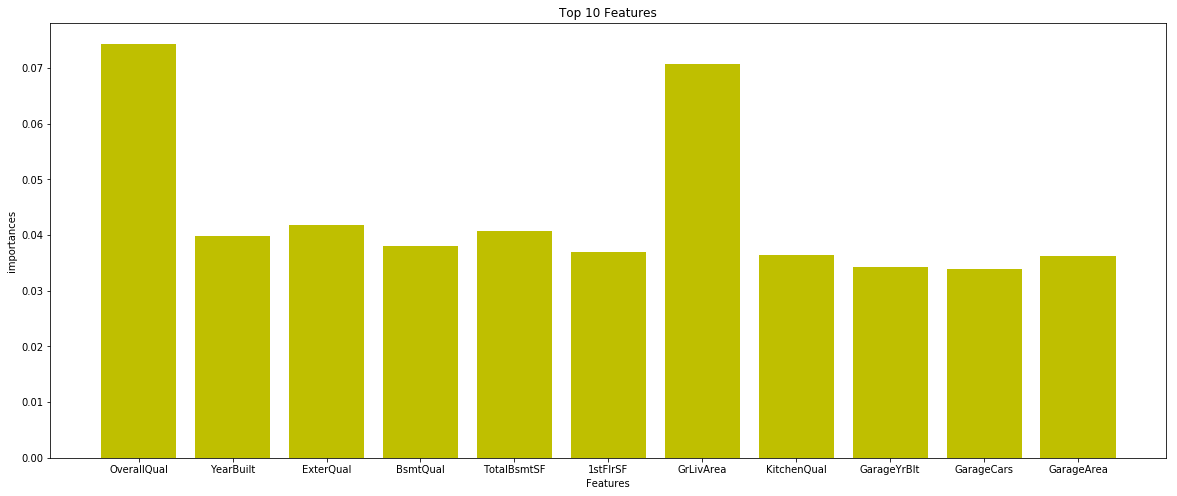

In [7]:
imp_cols = x.columns[RF.feature_importances_ > 0.0328]
vals = RF.feature_importances_[RF.feature_importances_ > 0.0328]

plt.figure(figsize=(20,8))
plt.title("Top 10 Features")
plt.bar(imp_cols,vals,
       color="y",  align="center")
plt.xlabel('Features')
plt.ylabel('importances')
plt.show()

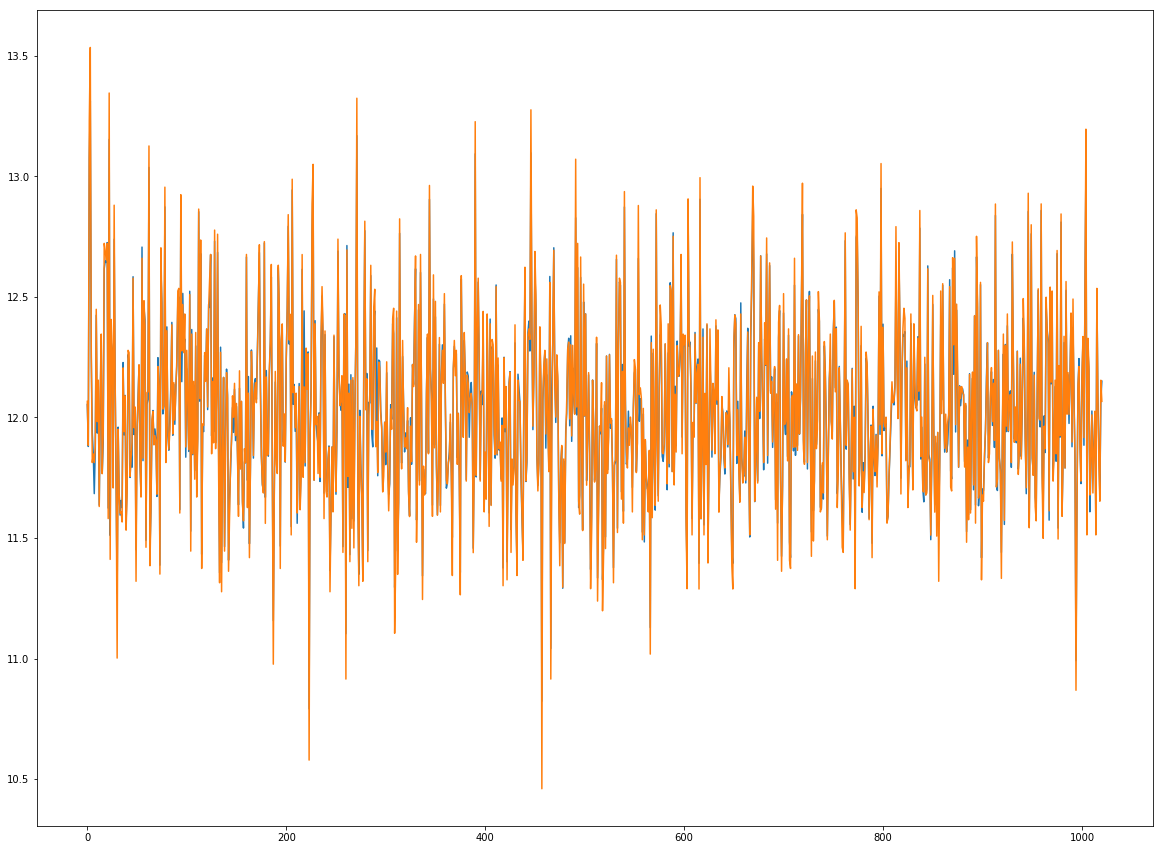

In [16]:
plt.subplots(figsize=(20,15))
plt.plot(y_pred_train)
plt.plot(y_train.values)

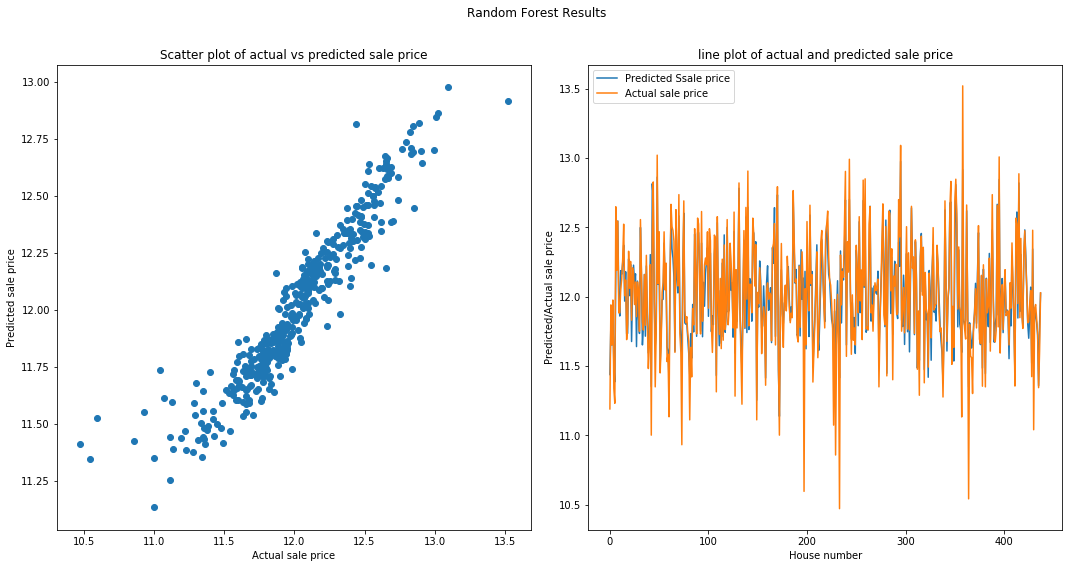

In [17]:
y_pred = RF.predict(x_test)
fig = plt.figure(figsize=(15,8))
fig.suptitle('Random Forest Results')
plt.subplot(121)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Scatter plot of actual vs predicted sale price')
plt.subplot(122)
plt.plot(y_pred, label='Predicted Ssale price')
plt.plot(y_test.values, label='Actual sale price')
plt.xlabel('House number')
plt.ylabel('Predicted/Actual sale price')
plt.title('line plot of actual and predicted sale price')
plt.legend()
plt.tight_layout()
fig.subplots_adjust(top=0.88)

In [64]:
## Calculate error with the actual values of sale price
y_pred = RF.predict(x_test)

MSEscore = np.sqrt(mean_squared_error(np.exp(y_pred), np.exp(y_test)))
print('Score RMSE = {}'.format(MSEscore))

MAEscore = np.sqrt(mean_absolute_error(np.exp(y_pred), np.exp(y_test)))
print('Score RMAE = {}'.format(MAEscore))

Score RMSE = 29473.80466390691
Score RMAE = 130.2935307010514


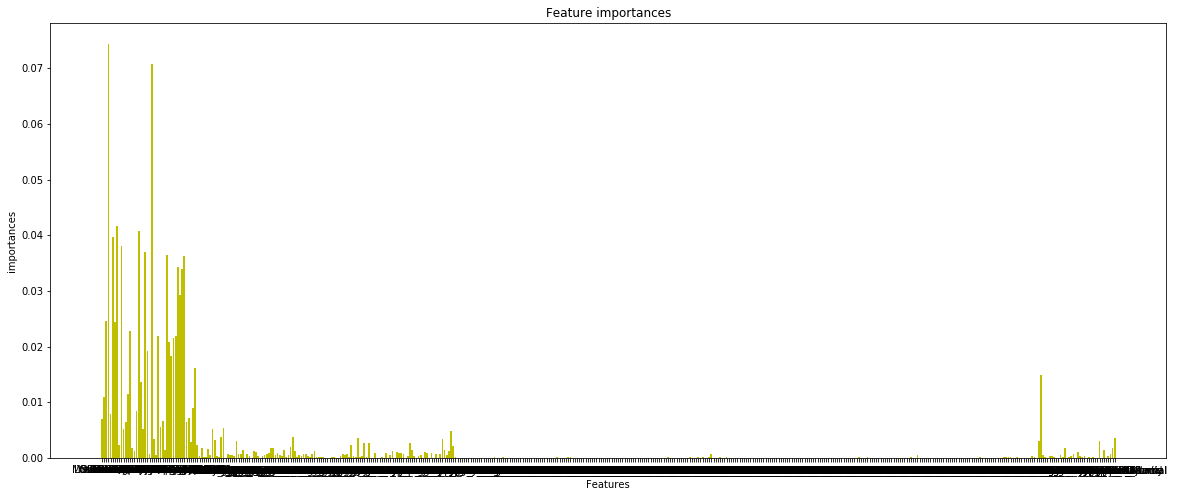

In [30]:
imp_cols = x.columns[RF.feature_importances_>0.0]
vals = RF.feature_importances_[RF.feature_importances_>0.0]

plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(imp_cols,vals,
       color="y",  align="center")
plt.xlabel('Features')
plt.ylabel('importances')
plt.show()

## Feature Selection using GradientBoostingRegressor

In [31]:
GBR = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=1500, max_depth=2)
cv_score = cross_val_score(GBR, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score).mean())

Cross validation scores for GBR model: 0.1369171768931508


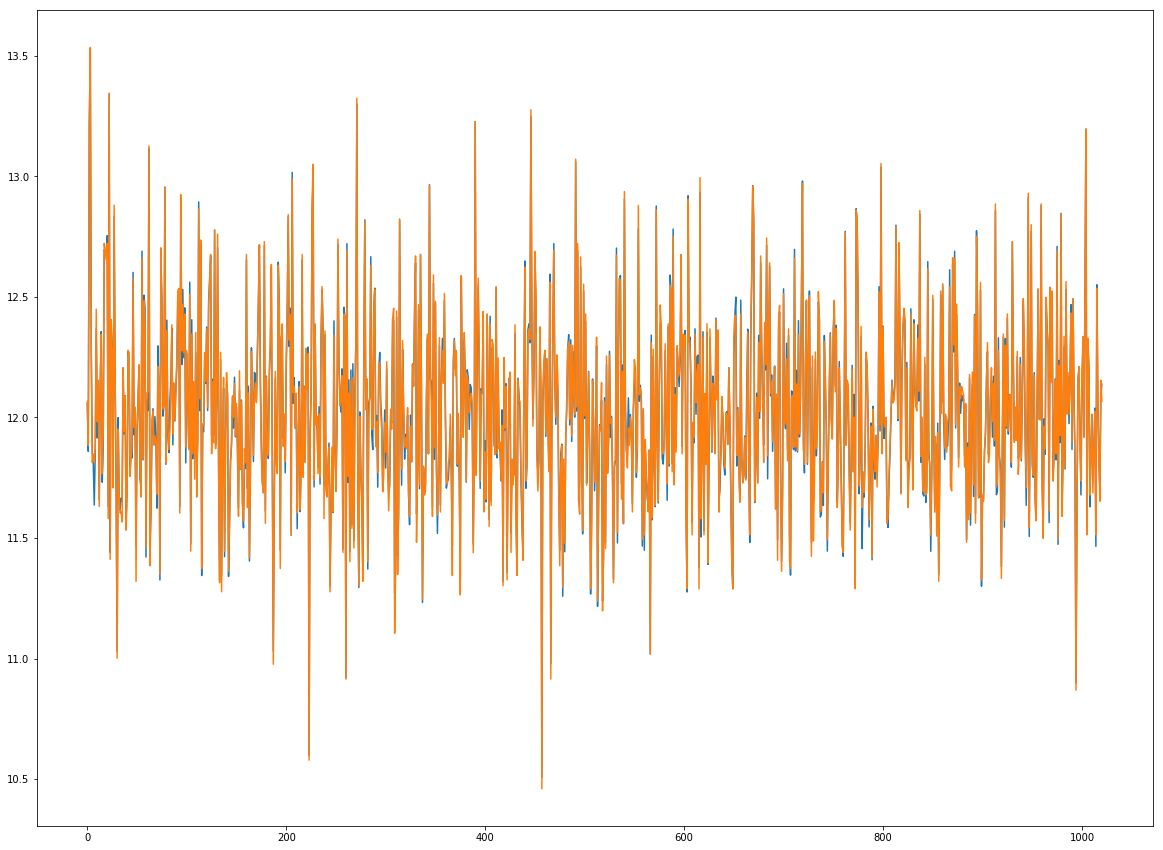

In [32]:
GBR.fit(x_train, y_train)
y_pred_train = GBR.predict(x_train)
plt.subplots(figsize=(20,15))
plt.plot(y_pred_train)
plt.plot(y_train.values)

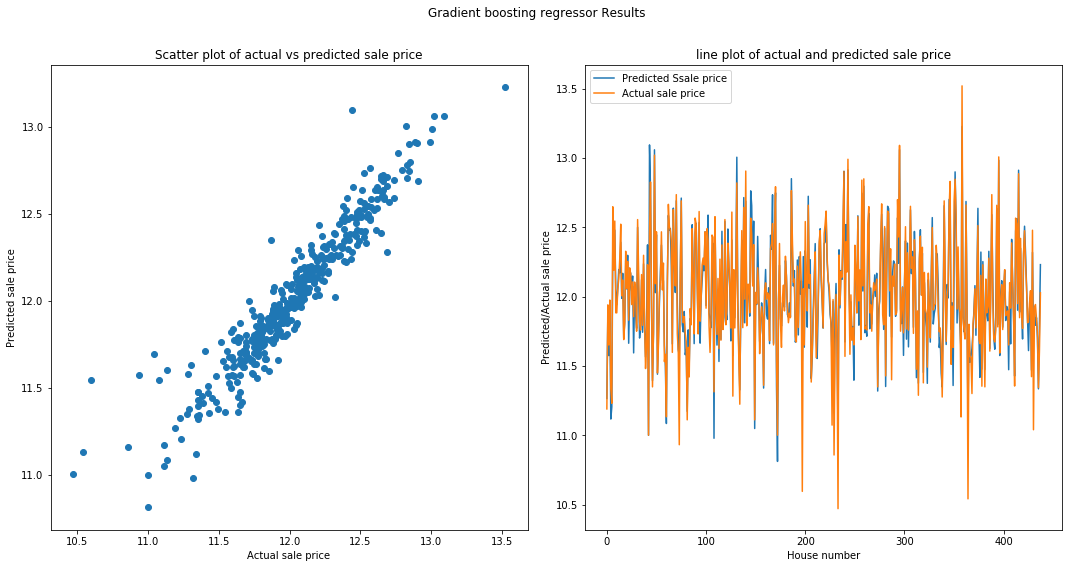

In [60]:
y_pred = GBR.predict(x_test)
fig = plt.figure(figsize=(15,8))
fig.suptitle('Gradient boosting regressor Results')
plt.subplot(121)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Scatter plot of actual vs predicted sale price')
plt.subplot(122)
plt.plot(y_pred, label='Predicted Ssale price')
plt.plot(y_test.values, label='Actual sale price')
plt.xlabel('House number')
plt.ylabel('Predicted/Actual sale price')
plt.title('line plot of actual and predicted sale price')
plt.legend()
plt.tight_layout()
fig.subplots_adjust(top=0.88)

In [65]:
## Calculate error with the actual values of sale price
y_pred = GBR.predict(x_test)

MSEscore = np.sqrt(mean_squared_error(np.exp(y_pred), np.exp(y_test)))
print('Score RMSE = {}'.format(MSEscore))

MAEscore = np.sqrt(mean_absolute_error(np.exp(y_pred), np.exp(y_test)))
print('Score RMAE = {}'.format(MAEscore))

Score RMSE = 24850.068530060966
Score RMAE = 123.20512665853853


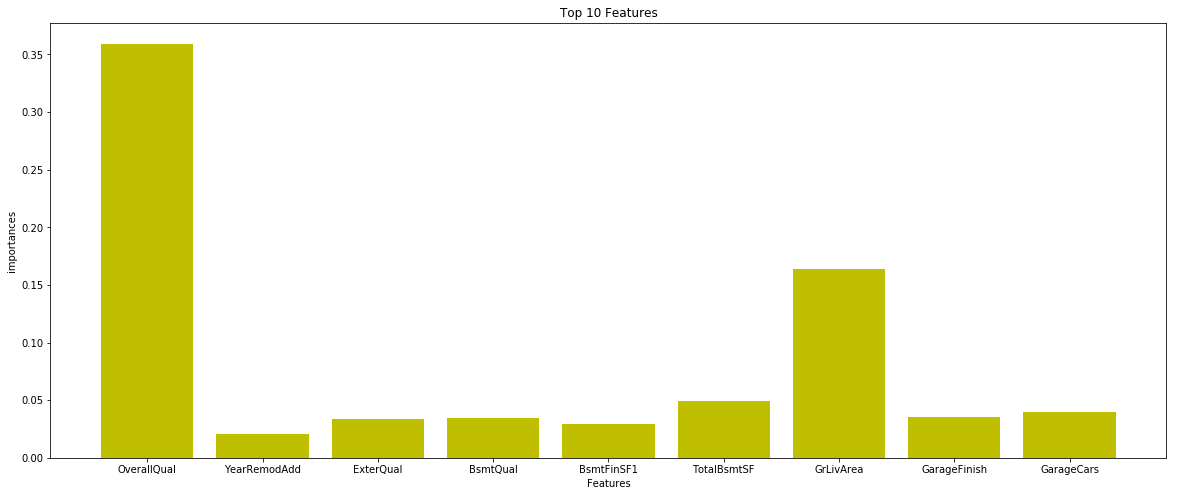

In [33]:
imp_cols = x.columns[GBR.feature_importances_ > 0.02]
vals = GBR.feature_importances_[GBR.feature_importances_ > 0.02]

plt.figure(figsize=(20,8))
plt.title("Top 10 Features")
plt.bar(imp_cols,vals,
       color="y",  align="center")
plt.xlabel('Features')
plt.ylabel('importances')
plt.show()

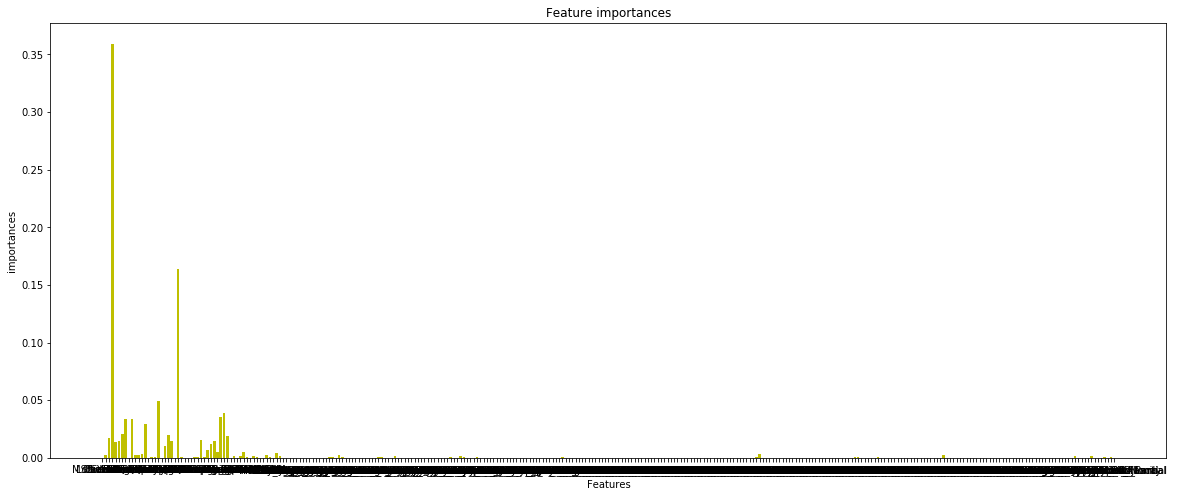

In [34]:
imp_cols = x.columns[GBR.feature_importances_ > 0.0]
vals = GBR.feature_importances_[GBR.feature_importances_ > 0.0]

plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(imp_cols,vals,
       color="y",  align="center")
plt.xlabel('Features')
plt.ylabel('importances')
plt.show()

**Gradient boosting regressor filter out most features. Now, I will work only with a small number of features. GBR will be used to select the features.**

In [35]:
(GBR.feature_importances_>0.002).sum()

31

In [36]:
x.loc[:,GBR.feature_importances_>0.002].columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'MoSold', 'MSZoning_RL', 'Neighborhood_Crawfor',
       'MasVnrArea_209.0', 'MasVnrArea_428.0'],
      dtype='object')

In [37]:
(RF.feature_importances_>0.01).sum()

26

In [38]:
x.loc[:,RF.feature_importances_>0.01].columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'Foundation_PConc'],
      dtype='object')

Most of the columns selected by GBR are the same as selected by Random forest

In [39]:
reduced_var_data = x.loc[:,GBR.feature_importances_>0.002].copy()


In [40]:
reduced_var_data['SalePrice'] = data['SalePrice']
reduced_var_data.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'MoSold', 'MSZoning_RL', 'Neighborhood_Crawfor',
       'MasVnrArea_209.0', 'MasVnrArea_428.0', 'SalePrice'],
      dtype='object')

In [41]:
reduced_var_data.to_csv('reduced_var_data.csv')